In [1]:
from math import sqrt
from numpy import arange
from numpy import meshgrid
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
# objectivce function (isto sto i loss funkcija)
def objective_function(x, y):
    return x**2 + y**2

def derivative(x, y):
    return asarray([2.0*x, 2.0*y])

def gradient_decent_RMSProp(objective, derivative,bounds,n_iter, step_size, rho):
    # # track all solution
    solutions = list()
    # generate initial point
    solution = bounds[:, 0] + rand(len(bounds))*(bounds[:,1] - bounds[:, 0])
    # ist of the sum square gradients for each variable
    sg_grad_avg = [0.0 for _ in range(bounds.shape[0])]
    # run grradient descent
    for it in range(n_iter):
        # calculating gradient
        gradient = derivative(solution[0], solution[1])
        # update the sum of the square partial derivatives
        for i in range(gradient.shape[0]):
            sg = gradient[i]**2.0
            sg_grad_avg[i] = sg_grad_avg[i] * rho + sg * (1.0 - rho)
        # build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
            # calcualte the steo size this variable
            alpha = step_size / (1e-8 + sqrt(sg_grad_avg[i]))
            # calcualte new position in this variable
            value = solution[i] - alpha * gradient[i]
            #store this variable
            new_solution.append(value)

        # evaluate candidate point
        solution = asarray(new_solution)
        solutions.append(solution)
        solution_eval = objective(solution[0], solution[1])

        # report progred
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions
    

>0 f([-0.06595602  0.340649  ]) = 0.12039
>1 f([-0.02886236  0.27929536]) = 0.07884
>2 f([-0.01276125  0.23417693]) = 0.05500
>3 f([-0.00562466  0.19863849]) = 0.03949
>4 f([-0.00246486  0.16964301]) = 0.02878
>5 f([-0.00107332  0.145492  ]) = 0.02117
>6 f([-0.00046434  0.12511178]) = 0.01565
>7 f([-0.00019955  0.10776512]) = 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) = 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) = 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) = 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) = 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) = 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) = 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) = 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) = 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) = 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) = 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) = 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) = 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) = 0.00024
>21

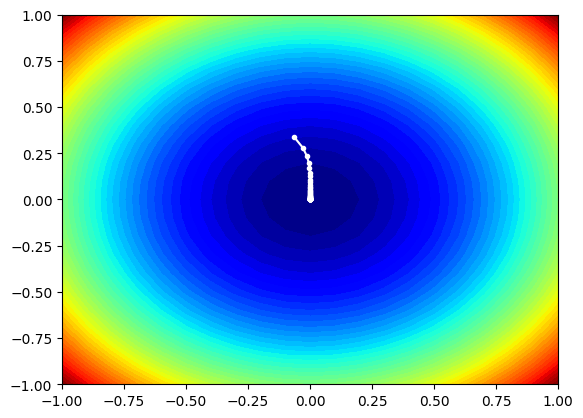

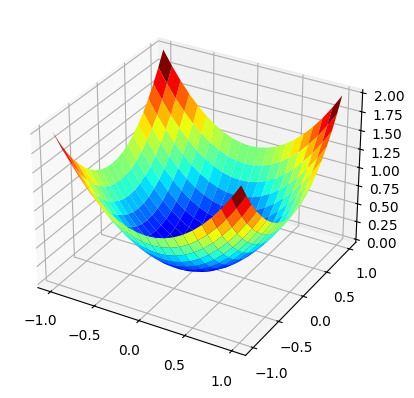

In [3]:
# seed the pseudo random number generator
seed(1)

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.01
rho = 0.99

solutions = gradient_decent_RMSProp(objective_function, derivative, bounds, n_iter, step_size, rho)

# print('Done!')
# print('f(%s) = %f' % (best, score))

# sample input range step 0.1
xaxis = arange(bounds[0, 0], bounds[0,1]+0.1, 0.1)
yaxis = arange(bounds[0, 0], bounds[0,1]+0.1, 0.1)
x, y = meshgrid(xaxis, yaxis)

#compute targer
results = objective_function(x, y)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
plt.show()


# plot of inut vs result
figure = plt.figure()
axis = figure.add_subplot(111,projection='3d')
axis.plot_surface(x, y, results, cmap = 'jet')
plt.show()
